In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import scipy
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
sns.set()

In [11]:
data = pd.read_csv('SF_HSF_COCO.csv')

In [12]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Images,Captions,Objects,HSF,SF_1,SF_2,SF_3,SF_4,...,SF_11,SF_12,SF_13,SF_14,SF_15,SF_16,SF_17,SF_18,SF_19,SF_20
0,0,0,1.jpg,a dog nose to nose with a young girl.',"['girl','dog','car','box','nose']",0.60000,0.860429,0.975257,0.954610,0.143405,...,0.548252,0.091375,0.169419,0.342657,0.618851,0.412275,0.422041,0.052679,0.842113,0.707262
1,1,1,2.jpg,a person holding a burnt foot long hotdog.',"['hotdog','ketchup','burger','bear','hand','pe...",0.33333,0.160144,0.769766,0.588016,0.022878,...,0.181015,0.025859,0.052476,0.135761,0.486044,0.153937,0.165577,0.184147,0.883450,0.763486
2,2,2,3.jpg,a smiling man and a woman making food.',"['men','women','food','utensils','knife']",0.60000,0.638531,0.927962,0.870558,0.106422,...,0.458417,0.076403,0.141659,0.286510,0.592589,0.344720,0.367716,0.149126,0.858188,0.737065
3,3,3,4.jpg,a young boy standing on top of a grass covered...,"['boy','tree','grass','ball','gloves']",0.80000,0.791865,0.961853,0.930425,0.131978,...,0.663760,0.110627,0.205113,0.368755,0.618388,0.456892,0.485088,0.138735,0.856456,0.733855
4,4,4,5.jpg,a person biting into a sandwich while sitting ...,"['man','sandwich','chair','bills','monitor','s...",0.57143,0.710035,0.958098,0.910347,0.088754,...,0.469871,0.058734,0.128882,0.299009,0.601304,0.357921,0.374917,0.105793,0.888224,0.754726


In [13]:
def SFvsHSF(sf,hsf,axes,x_label):
    
    regr = linear_model.LinearRegression()
    correlation, p = scipy.stats.pearsonr(sf,hsf)
        
    sf =  np.reshape(sf,((len(sf), 1)))
    hsf =  np.reshape(hsf,(len(hsf), 1))
    regr.fit(sf, hsf)
    x_test = sf
    y_pred = regr.predict(x_test)
    x = [i[0] for i in sf]
    y = [i[0] for i in hsf]
    
    X = np.array(sf)
    Y = np.array(hsf)

    kfold = model_selection.KFold(n_splits=10)
    model = LinearRegression()
    scoring = 'r2'

    results = model_selection.cross_val_score(model, X.reshape(-1,1), Y.reshape(-1,1), cv=kfold, scoring=scoring)
    r2 = results.mean()
    
    my_data = pd.DataFrame({'x':x, 'y':y})
    sns.regplot(x='x',y='y', ci=95, data=my_data, ax=axes)
    axes.set_ylabel('')    
    axes.set_xlabel(x_label)
    axes.set_xlim(0,1.01)
    axes.set_ylim(0,1.02)
    
    axes.text(1.05, 0.6, '$\\rho$ = '+str(round(correlation,2)))
    axes.text(1.05, 0.4, 'p = '+str(p))
    axes.text(1.05, 0.2, '$R^2$ = '+str(round(r2,2)))   

In [14]:
HSF = [value for value in data['HSF']]
SF_1 = [value for value in data['SF_1']]
SF_2 = [value for value in data['SF_2']]
SF_3 = [value for value in data['SF_3']]
SF_4 = [value for value in data['SF_4']]
SF_5 = [value for value in data['SF_5']]
SF_6 = [value for value in data['SF_6']]
SF_7 = [value for value in data['SF_7']]
SF_8 = [value for value in data['SF_8']]
SF_9 = [value for value in data['SF_9']]
SF_10 = [value for value in data['SF_10']]
SF_11 = [value for value in data['SF_11']]
SF_12 = [value for value in data['SF_12']]
SF_13 = [value for value in data['SF_13']]
SF_14 = [value for value in data['SF_14']]
SF_15 = [value for value in data['SF_15']]
SF_16 = [value for value in data['SF_16']]
SF_17 = [value for value in data['SF_17']]
SF_18 = [value for value in data['SF_18']]
SF_19 = [value for value in data['SF_19']]
SF_20 = [value for value in data['SF_20']]

$$x=\frac{\#N}{\#O} \quad y=\frac{\#O}{\#N}$$

$$SF_1 = {S_i}^{y}\quad SF_2 = {S_i}^{\frac{y}{max(\#O,\#N)+1}}\quad SF_3 = {S_i}^{\frac{y}{\sqrt{max(\#O,\#N)}+1}}\quad SF_4 = {\frac{{S_i}^{y}}{max(\#O,\#N)+1}}\quad SF_5 = {\frac{{S_i}^{y}}{\sqrt{max(\#O,\#N)}+1}}$$

$$SF_6 = {S_i}^{1-x}\quad SF_7 = {S_i}^{\frac{1-x}{max(\#O,\#N)+1}}\quad SF_8 = {S_i}^{\frac{1-x}{\sqrt{max(\#O,\#N)}+1}}\quad SF_{9} = {\frac{{S_i}^{1-x}}{max(\#O,\#N)+1}}\quad SF_{10} = {\frac{{S_i}^{1-x}}{\sqrt{max(\#O,\#N)}+1}}$$

$$SF_{11} = {S_i}*{x} \quad SF_{12} = {S_i}*{\frac{x}{max(\#O,\#N)+1}}\quad SF_{13} = {S_i}*{\frac{x}{\sqrt{max(\#O,\#N)}+1}}$$  

$$ SF_{14} = {S_i}*(1-\frac{1}{1+x}) \quad SF_{15} = (1-e^{(-S_i^{1-x})})\quad SF_{16} = {S_i}*(1-e^{(-x)}) \quad SF_{17} = (1-e^{(-S_i*x)})$$

$$SF_{18} = 1 - ({S_i}^{x}) \quad SF_{19} = 1 - ({\frac{{S_i}^{x}}{max(\#O,\#N)+1}})\quad SF_{20} = 1 -({\frac{{S_i}^{x}}{\sqrt{max(\#O,\#N)}+1}})$$

|     | SF-1  | SF-2   | SF-3  | SF-4  | SF-5  | SF-6  | SF-7  | SF-8  | SF-9  | SF-10 | SF-11 | SF-12 | SF-13 | SF-14 | SF-15 | SF-16 | SF-17 | SF-18 |SF-19 | SF-20 |
|-----|-------|--------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| rho | 0.69  | 0.56   | 0.62  | 0.67  | 0.71  | 0.81  | 0.71  | 0.75  | 0.63  | 0.79  | 0.93  | 0.87  | 0.93  | 0.82  | 0.75  | 0.84  | 0.9   |   0.13    |  -0.18   | -0.04      | 
| p   | 4e-15 | 10e-10 | 5e-12 | 1e-14 | 2e-16 | 1e-24 | 2e-16 | 5e-19 | 1e-12 | 4e-22 | 1e-44 | 2e-32 | 2e-43 | 2e-25 | 3e-19 | 6e-28 | 1e-36 |   0.18    | -0.07   |   0.66    | 
| R2  | 0.32  | 0.12   | 0.23  | 0.42  | 0.4   | 0.48  | 0.25  | 0.31  | 0.29  | 0.53  | 0.76  | 0.74  | 0.8   | 0.53  | 0.32  | 0.58  | 0.71  |  -0.18      | -0.13   |  -0.17     | 

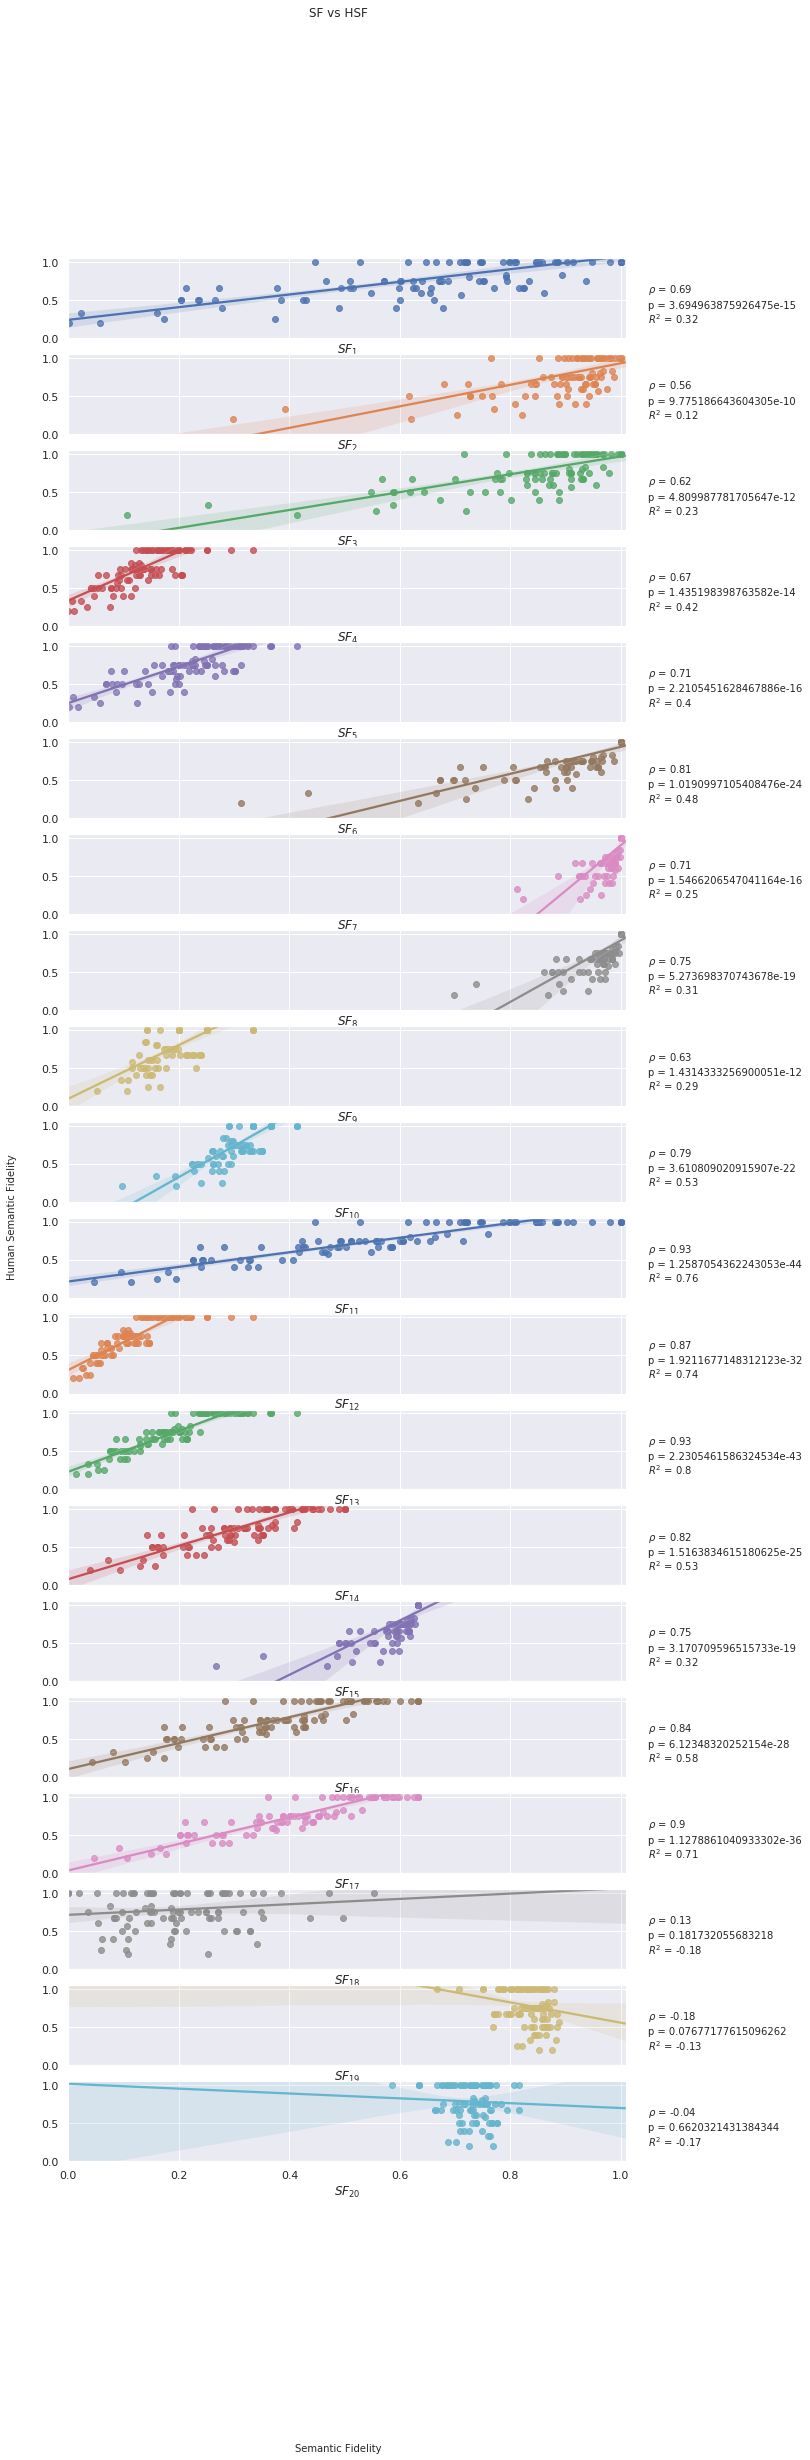

In [16]:
fig, axs = plt.subplots(20, 1, sharex=True, sharey=True,figsize=(10,35))

((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20)) = axs

SFvsHSF(SF_1,HSF,ax1,'$SF_{1}$')
SFvsHSF(SF_2,HSF,ax2,'$SF_{2}$')
SFvsHSF(SF_3,HSF,ax3,'$SF_{3}$')
SFvsHSF(SF_4,HSF,ax4,'$SF_{4}$')
SFvsHSF(SF_5,HSF,ax5,'$SF_{5}$')
SFvsHSF(SF_6,HSF,ax6,'$SF_{6}$')
SFvsHSF(SF_7,HSF,ax7,'$SF_{7}$')
SFvsHSF(SF_8,HSF,ax8,'$SF_{8}$')
SFvsHSF(SF_9,HSF,ax9,'$SF_{9}$')
SFvsHSF(SF_10,HSF,ax10,'$SF_{10}$')
SFvsHSF(SF_11,HSF,ax11,'$SF_{11}$')
SFvsHSF(SF_12,HSF,ax12,'$SF_{12}$')
SFvsHSF(SF_13,HSF,ax13,'$SF_{13}$')
SFvsHSF(SF_14,HSF,ax14,'$SF_{14}$')
SFvsHSF(SF_15,HSF,ax15,'$SF_{15}$')
SFvsHSF(SF_16,HSF,ax16,'$SF_{16}$')
SFvsHSF(SF_17,HSF,ax17,'$SF_{17}$')
SFvsHSF(SF_18,HSF,ax18,'$SF_{18}$')
SFvsHSF(SF_19,HSF,ax19,'$SF_{19}$')
SFvsHSF(SF_20,HSF,ax20,'$SF_{20}$')

fig.suptitle('SF vs HSF')
   
fig.text(0.5, 0.01, 'Semantic Fidelity', ha='center')
fig.text(0.04, 0.5, 'Human Semantic Fidelity', va='center', rotation='vertical')

plt.ylim(top=1.05)
plt.show()
